Random varijable i distribucije

Diskretna distribucija (discrete distribution) - ona koja povezuje pozitivnu verovatnoću
sa diskretnim ishodima. Često ćemo želeti da modeliramo distribuciju kroz kontinuum
ishoda. (U naše svrhe, ovi rezultati će uvek biti stvarni brojevi,
iako u stvarnom životu to nije uvek slučaj.) Na primer, uniformna distribucija
stavlja jednaku težinu na sve brojeve između 0 i 1.

Pošto je beskonačno mnogo brojeva između 0 i 1, to znači da je težina koju dodeljuje pojedinim brojevima mora nužno biti jednaka nuli. 

Iz tog razloga mi predstavljamo kontinuiranu raspodelu sa funkcijom gustine verovatnoće (pdf, probability density function), tako da verovatnoća da ćemo videti vrednost u određenom intervalu jednaka je integralu gustine
funkcije tokom intervala.

Ako vam je integralni račun zarđao, jednostavniji način razumevanja to je da ako distribucija ima funkciju gustine f, onda je verovatnoća pojave vrednosti između k i k + h je otprilike h * f(k) ako je h mali.


In [20]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

In [5]:
uniform_pdf(0)

1

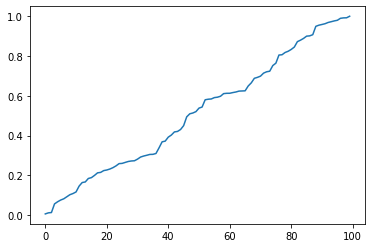

In [3]:
#plotovanje sortirane uniformne distribucije za 100 dogadjaja
import numpy
import matplotlib.pyplot as plt
array = numpy.random.uniform(low=0,high=1,size=100)
array.sort()
plt.plot(array)
plt.show()

In [ ]:
#Funkcija random.random() daje random varijablu sa uniformnom distribucijom

In [23]:
import numpy as np

In [20]:
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

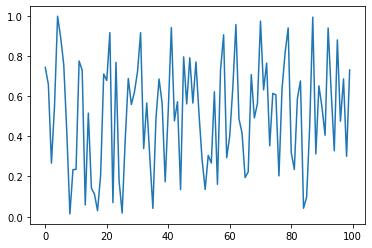

In [24]:
x=np.random.rand(100)
plt.plot(x)

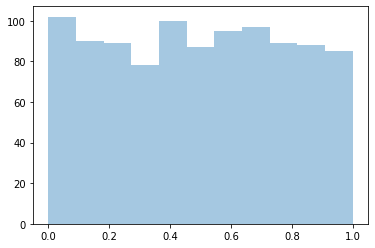

In [26]:
sns.distplot(np.random.rand(1000), hist=True, kde=False)

plt.show()

In [101]:
x.mean()

0.49205976004689633

In [102]:
x.std()

0.296122365538983

Normalna distribucija

In [16]:
import math
from math import exp, expm1, sqrt, pi

In [22]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

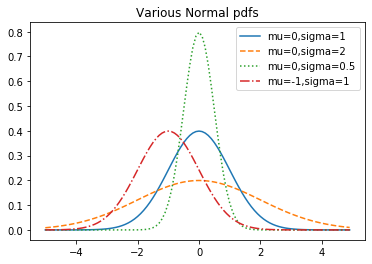

In [41]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [43]:
from math import erf

In [21]:
#Kumulativna funckija distribucije
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

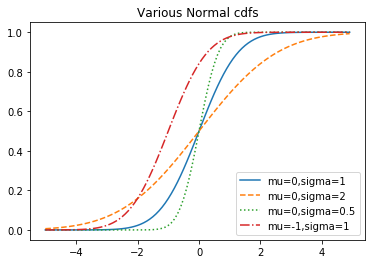

In [45]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

Ponekad ćemo morati da se obratimo kumulutavinoj funkciji distribucije(normal_cdf) da bismo pronašli vrednost koja odgovara određena verovatnoća. Ne postoji jednostavan način izračunavanja inverzije kumulativne funckije, ali normal_cdf je
kontinuirana i strogo rastuća, tako da možemo koristiti binarnu pretragu:

In [23]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.01):
    """find approximate inverse using binary search"""
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z, low_p = -10.0, 0 # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p = 10.0, 1 # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # consider the midpoint
        mid_p = normal_cdf(mid_z) # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
# midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z

In [55]:
#Ova funkcija vraća standardizovani skor za određenu zadatu verovatnoću
inverse_normal_cdf(0.95)

1.650390625

Centralna granična teorema

Jedan od razloga što je normalna distribucija toliko korisna je centralna granična teorema, koja kaže (u suštini) da je slučajna promenljiva definisana kao prosek velikog broja nezavisnih i identično raspoređenih slučajnih varijabli sama po sebi normalno distribuirana. Ovo znači da veliki broj nezavisnih nasumičnih događaja izraženih kroz slučajnu promenljivu p spontano zauzimaju oblik zvonaste, normalne distribucije.
Konkretno, ako su k1, ..., kn slučajne promenljive sa prosekom m i standardnom devijacijom s,
a ako je n velik, tada:

1/n (k1 + ... + kn)

približno je normalno raspoređen sa srednjom µ i standardnom devijacijom s / n.
Ekvivalentno (ali često korisnije),
((k1 + ... + kn) - mn)/s sqrt(n)

je približno normalno raspoređena sa aritmetičkom sredinom 0 i standardnom devijacijom 1.

Lak način da se to ilustruje je gledanje binomnih slučajnih varijabli koje imaju
dva parametra n i p. Binomna slučajna varijabla sa ova dva parametra (n,p) je jednostavno suma od svih n nezavisnih Bernouli (p) slučajnih varijabli, od kojih je svaka jednaka 1 sa verovatnoćom p i 0 sa verovatnoćom 1 - p:

In [7]:
import random

In [91]:
#funkcija daje nasumicam broj od 0 do 1, u skladu sa uniformnom distribucijom
random()

0.4803762637909952

In [8]:
from random import random

In [9]:
def bernoulli_trial(p):
    if random() < p:
        return 1
    else: 
        return 0

In [31]:
#Binomna distribucija jeste diskretna distribucija (ishod moze biti samo ceo broj, odnosno dogadjaj)
#Osnovna pretpostavka binomne distribucije je da postoji konačan broj n nezavisnih eksperimenata u kojima je 
#mogući rezultat "uspeh" ili "neuspeh". Verovatnoća "uspeha" iznosi p i ista je za sve eksperimente, 
#dok verovatnoća "neuspeha" iznosi 1-p. Da neka serija brojeva podleže binomnoj distribuciji može se skraćeno napisati kao

#X ~ B(n, p)

#gde je

#X - slučajna promenljiva,
#B - oznaka za binomnu distribuciju,
#n - broj eksperimenata, a
#p - verovatnoća uspeha.

#Vrednosti n i p se nazivaju parametri distribucije i oba su neophodna da bi se distribucija opisala u potpunosti.
#Slučajna promenljiva X sadrži broj eksperimenata koji su izvršeni dok se nije desio "uspeh".
#Verovatnoća dešavanja r uspeha iz n nezavisnih eksperimenata, pri čemu je u svakom eksperimentu 

#Binomna distribucija

#P2=n!/(r!*(n-r)!)*(p)r*(1-p)n-r 

#pri čemu je 0≤r≤ n

#Broj eksperimenata n je ekvivalent pojmu veličina uzorka.

#Binomna distribucija se može koristiti kao model za uzorkovanje samo kada se vrši uzorkovanje sa ponavljanjem, 
#tj. kada izabrani element ponovo učestvuje u biranju. 
#Samo u izuzetnim slučajevima, kada je populacija ekstremno velika može se aproksimirati binomna distribucija, 
#jer se smatra da jedan nedostajući element populacije veoma malo utiče na verovatnoću izbora sledećeg elementa.

#Binomna distribucija bacanja novcica deset puta
from numpy import random

x = random.binomial (n=1, p=0.5, size=10)

print(x)

[0 1 0 0 1 1 0 1 1 1]


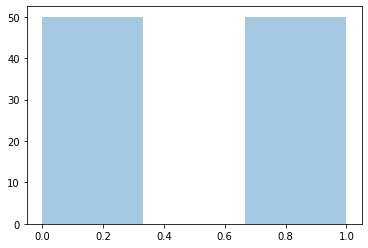

In [29]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot (random.binomial(n=1, p=0.5, size=100),  hist=True, kde=False)


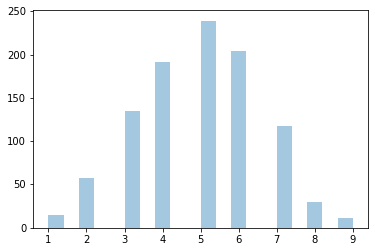

In [17]:


sns.distplot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=False)

plt.show()

In [10]:
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

Srednja vrednost Bernoulli (p) promenljive je p, a njena standardna devijacija je sqrt(p(1 - p)).
Centralna granična teorema kaže da kako n postaje veoma veliko, binomna (n, p) varijabla je približno
normalna slučajna varijabla sa aritmetičkom sredinom m = np i standardnom devijacijom
s = sqrt(np(1 - p)). Na gornjem grafikonu se jasno vidi - na 1000 bacanja desetostrane kocke od kojih je verovatnoca uspeha 0.5. Srednja vrednost pocinje da dobija vrednost 5 (np, 10x0.5) 

Na 4 stranice kocke je napisano slovo A, dok je na preostale dve stranice napisano slovo B. Kolika je verovatnoća da će iz 4 bacanja 2 puta da se okrene slovo A?

Odgovor: U našem primeru, n=4, jer imamo ukupno 4 bacanja, a r=2. Verovatnoća da će se kockica okrenuti na slovo A iznosi 4/6, odnosno p=2/3, što znači da je (1-p)=1/3.

Koristeći se formulom za binomnu distribuciju, dobijamo

P2=4!/(2!*2!)*(2/3)2*(1/3)2=6*4/9*1/9=24/81=29.63%

In [1]:
import collections
from collections import Counter

In [17]:
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()], [v / num_points for v in histogram.values()], 0.8, color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
# use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
        for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

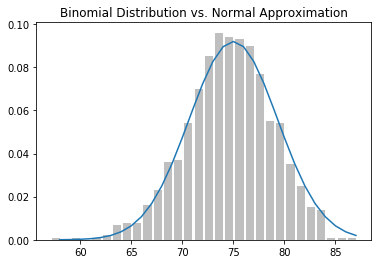

In [24]:
make_hist(0.75, 100, 1000)

In [ ]:
Motiv ove aproksimacije je: ako želimo da znamo koja je verovatnoća da se novčić pojavi više od 60 glava u 100 bacanja, 
možete to proceniti kao verovatnoću da je Normal (50,5) veća od 60, što je lakše nego računanje binoma (100,0.5) cdf.
Iako u većini aplikacija verovatno koristimo statističke podatke koje softver lako računa
za sve verovatnoće koje želimo.

In [32]:
data = [binomial(10, 3) for _ in range(10)]
data

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]